In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', labelsize = 12)
plt.rc('font', size = 12)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
pd.read_csv('data-dictionary+.csv')

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [8]:
df.shape

(167, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Dataset is clean, and no null values

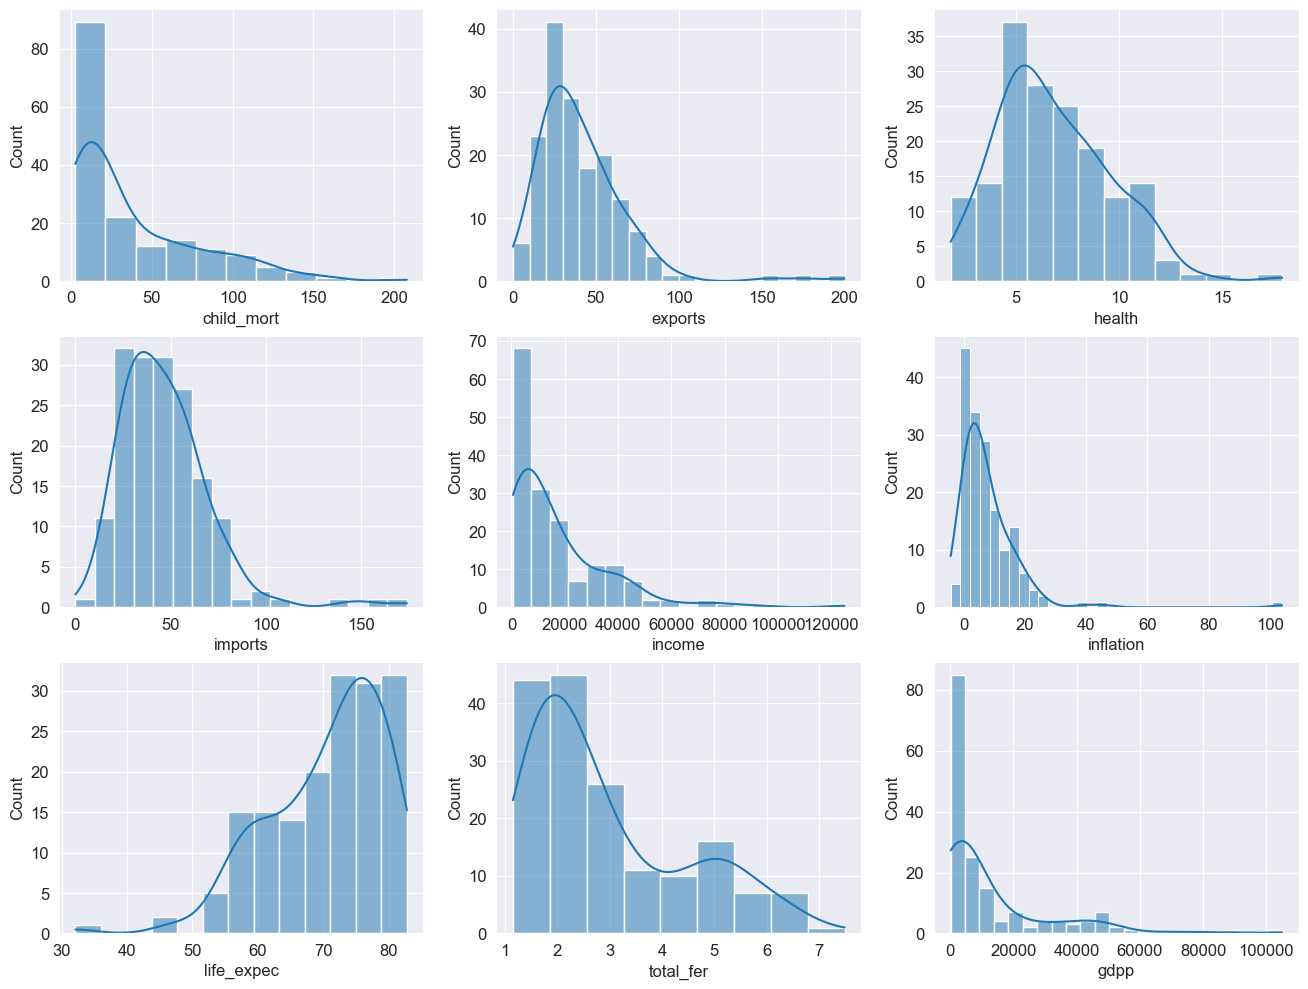

In [261]:
sns.set_style('darkgrid')
fig, axe = plt.subplots(3,3, figsize = [16,12])
cnt = 0
for col in df.columns[1:]:
    i = cnt//3
    j = cnt%3
    sns.histplot(df[col], kde = True, ax = axe[i][j])  
    cnt +=1
plt.show()

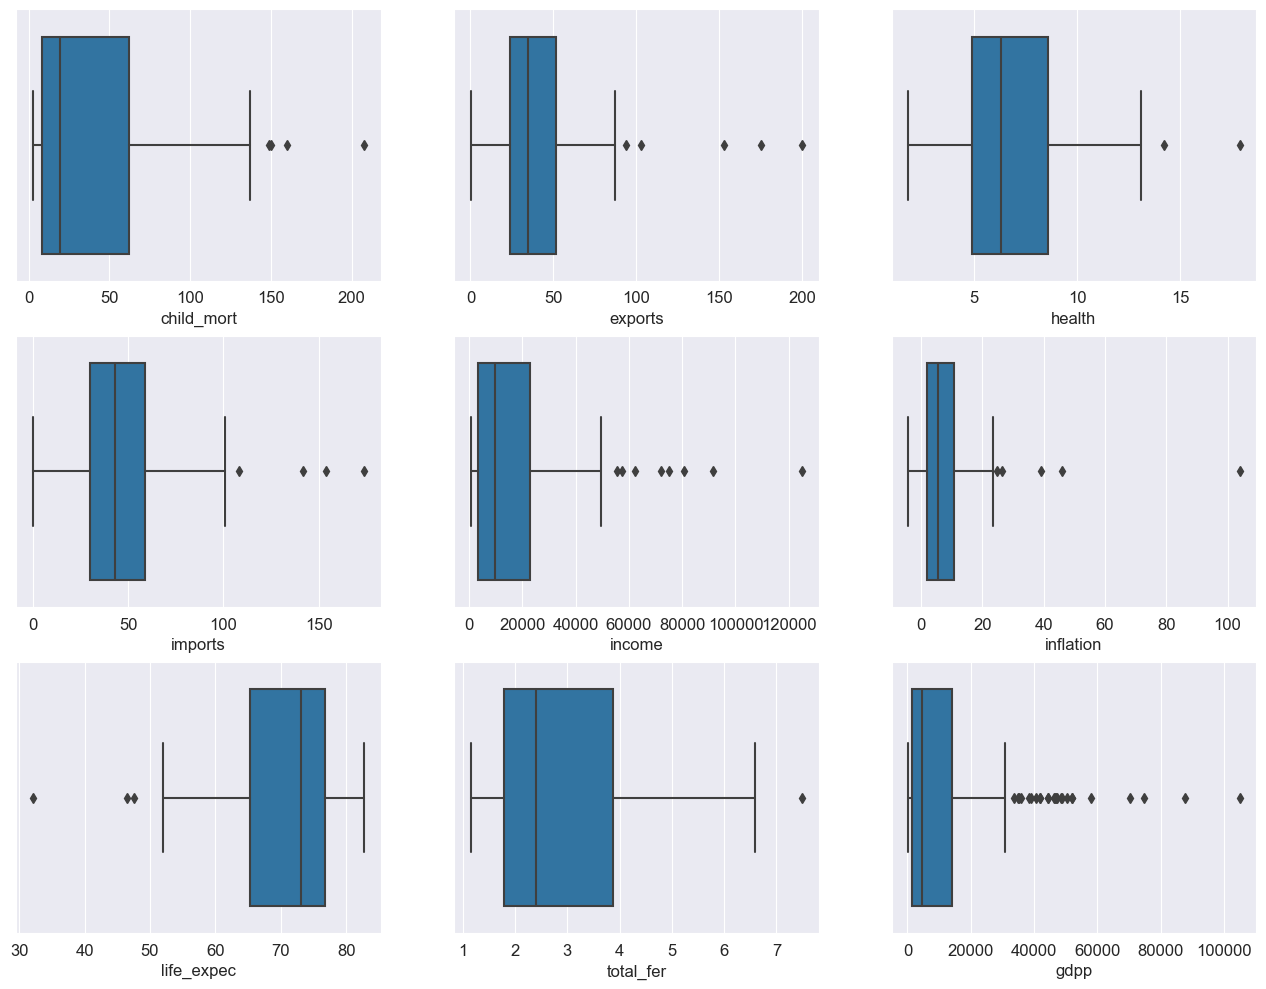

In [262]:
sns.set_style('darkgrid')
fig, axe = plt.subplots(3,3, figsize = [16,12])
cnt = 0
for col in df.columns[1:]:
    i = cnt//3
    j = cnt%3
    sns.boxplot(df[col], ax = axe[i][j])  
    cnt +=1
plt.show()

In [49]:
# checking correlation
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

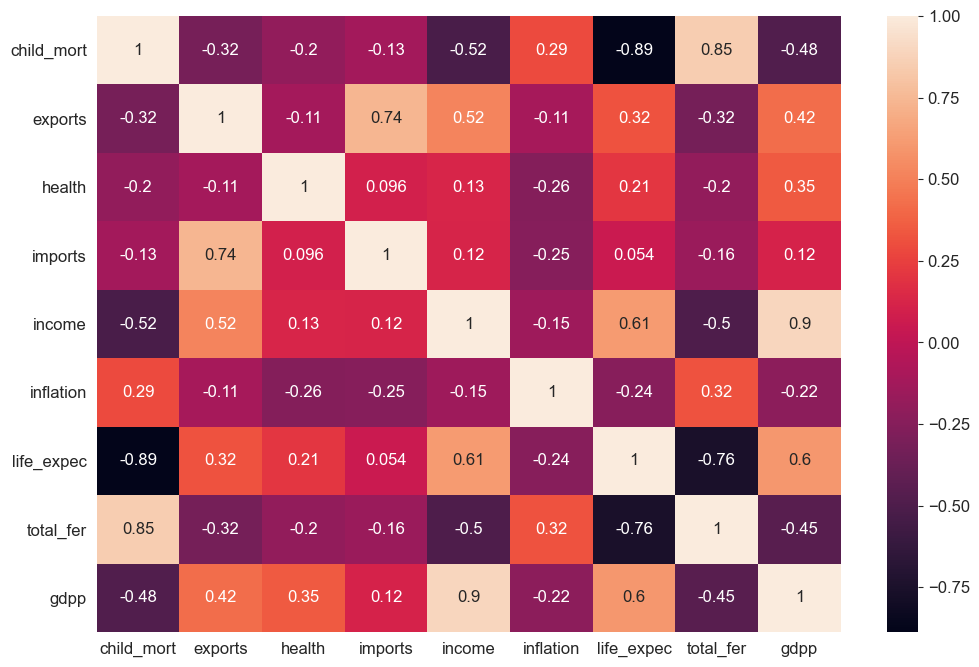

In [263]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)

### Observations-

1. Clearly, we can see positive and negative correlation between some kind of variables. For example, child_mortality has postive correlation only with inflation and total_fertility. So, lets say child_mortality is a negative feature. Whereas, the feature income, has negative correlation with child_mortality,  inflation and total_fertility. So, let's say income is a positive feature.

2. Since, our objective is to identify country that are in dire need of aid, we can remove outliers based on positive features.


### Model-1. Without removing outliers, k-means clustering

In [17]:
scaler = MinMaxScaler()

df_m1 = scaler.fit_transform(df.iloc[:,1:].values)

In [19]:
# model
num_of_clusters = 3

model = KMeans(n_clusters=num_of_clusters, random_state = 1)
model.fit(df_m1)

KMeans(n_clusters=3, random_state=1)

In [20]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [22]:
df_final = df.copy(deep=True)

In [24]:
df_final['kmeans'] = model.labels_

In [36]:
df_final.groupby('kmeans')['country'].count()

kmeans
0    86
1    46
2    35
Name: country, dtype: int64

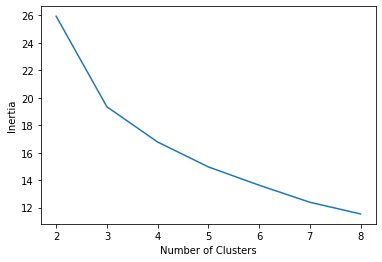

In [74]:
## selection of right k by elbow curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_m1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### The optimal number of cluster by SSD = 3 from above plot

Luckily, we already trained the model for number of clusters = 3, so won't do it again.

In [92]:
for i in range(3):
    ser = df_final[ df_final['kmeans'] == i]['country']
    print('\x1b[1m','cluster', i,':\n','\x1b[0m', ser.to_numpy())
    print('='*50)
    

 cluster 0 :
  ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Montenegro' 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'South Africa' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venez

### Outliers and treatment, there are outliers in the data, but since we have only 167 datapoints only and also, the information we have can deviate in demographically, care is to be taken to remove outliers, based on what kind of features?

We will remove outliers based on only positive features - 'gdpp', since is objective is to identify countries that are in
dire need of aid.

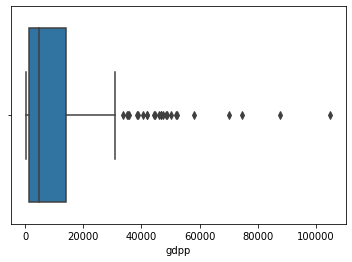

In [76]:
sns.boxplot(df['gdpp'])
plt.show()

In [93]:
q1, q3 = df['gdpp'].quantile([0.25,0.75])
q1,q3

(1330.0, 14050.0)

In [99]:
df_m2 = df.iloc[:, 1:][df['gdpp'] < (q3+1.5*(q3 - q1))]
df_m2 = MinMaxScaler().fit_transform(df_m2)
df_m2.shape

(142, 9)

### Model-2. Outlier removed, k-means clustering

In [100]:
# model
num_of_clusters = 3

m2 = KMeans(n_clusters=num_of_clusters, random_state = 1)
m2.fit(df_m2)

KMeans(n_clusters=3, random_state=1)

In [122]:
pd.Series(m2.labels_).value_counts()

2    73
0    42
1    27
dtype: int64

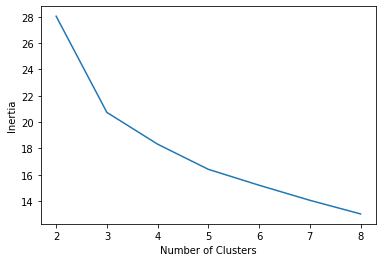

In [102]:
## selection of right k by elbow curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_m2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [112]:
df_outlier_removed = pd.concat([df['country'][df['gdpp'] < (q3+1.5*(q3 - q1))].reset_index(drop = True), pd.Series(m2.labels_)], axis = 1)
df_outlier_removed.shape

(142, 2)

In [114]:
for i in range(3):
    ser = df_outlier_removed[ df_outlier_removed[0] == i]['country']
    print('\x1b[1m','cluster', i,':\n','\x1b[0m', ser.to_numpy())
    print('='*50)

 cluster 0 :
  ['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Kenya' 'Kiribati' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'Solomon Islands' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
 cluster 1 :
  ['Antigua and Barbuda' 'Bahamas' 'Bahrain' 'Barbados' 'Chile' 'Croatia'
 'Cyprus' 'Czech Republic' 'Equatorial Guinea' 'Estonia' 'Greece'
 'Hungary' 'Israel' 'Latvia' 'Libya' 'Lithuania' 'Malaysia' 'Malta' 'Oman'
 'Poland' 'Portugal' 'Saudi Arabia' 'Seychelles' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain']
 cluster 2 :
  ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 

In [119]:
df_final =  pd.merge(left = df_final, right= df_outlier_removed, on = 'country')
df_final.rename({0:'kmeans_no_outlier'}, axis = 1, inplace=True)
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,kmeans_no_outlier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
138,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2
139,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2
140,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0


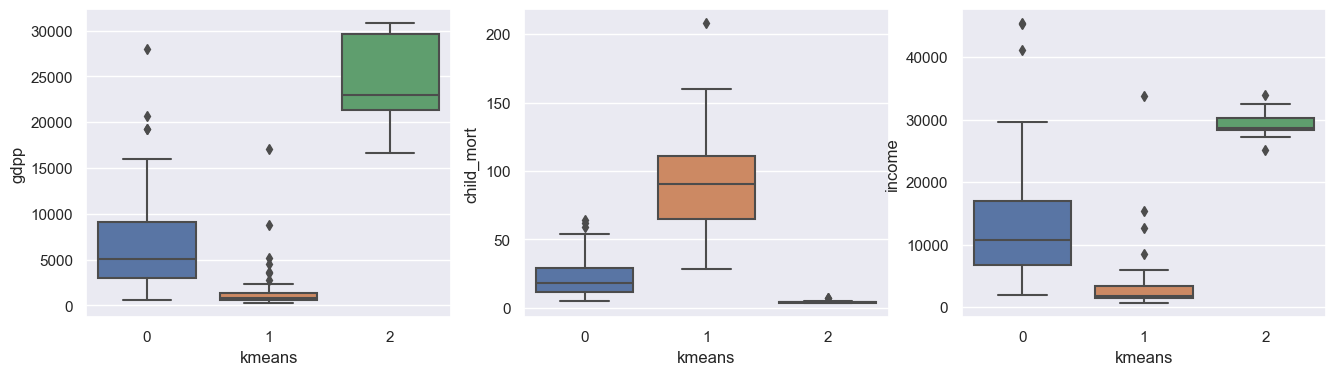

In [277]:
# analysis for gdpp, child_mort and income for clusters-
vars = ['gdpp','child_mort','income']

sns.set_style('darkgrid')
fig, axe = plt.subplots(1,3, figsize = [16,4])

# for kmeans-all data points
for i,col in enumerate(vars):
    sns.boxplot(data = df_final, x = 'kmeans', y = col, ax = axe[i])
    
plt.show()

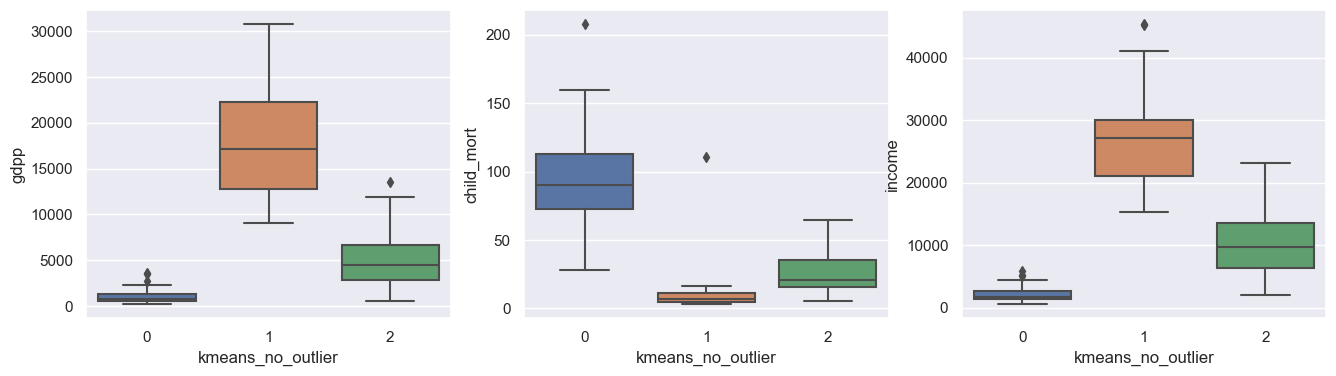

In [276]:
# for kmeans-outliers removed
sns.set_style('darkgrid')
fig, axe = plt.subplots(1,3, figsize = [16,4])

# for kmeans-all data points
for i,col in enumerate(vars):
    sns.boxplot(data = df_final, x = 'kmeans_no_outlier', y = col, ax = axe[i])
    
plt.show()

### Observations-

1. In first model, where we did no remove outliers, we got cluster of 46 countries, which has low gdpp, high child_mort and low income.
2. In second model, where we removed outliers - developed country with very high gdpp. After clustering, we got cluster of 42 under-developed countries

In [129]:
df_final['country'][(df_final['kmeans']==1) & (df_final['kmeans_no_outlier']==0)].to_numpy()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

### Model-3. Hierarchical clustering

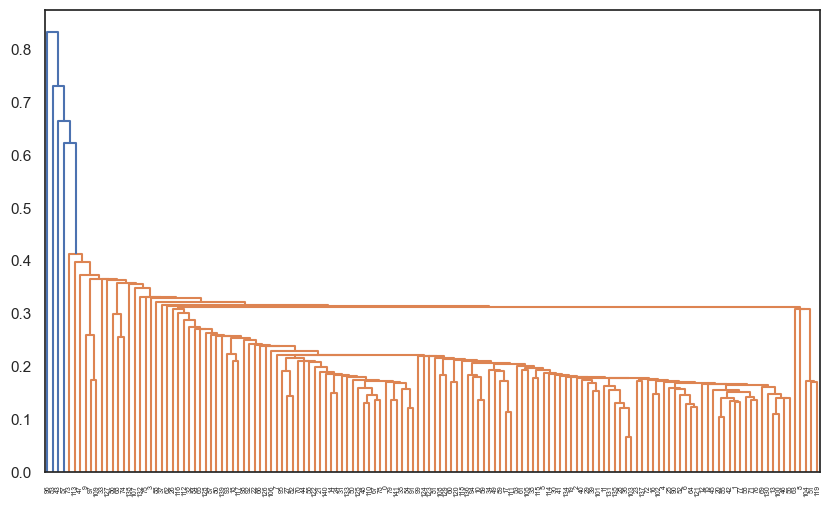

In [283]:
# single linkage
mergings = linkage(df_m2, method="single", metric='euclidean')
sns.set_style('white')
plt.figure(figsize = (10,6))
dendrogram(mergings)
plt.show()

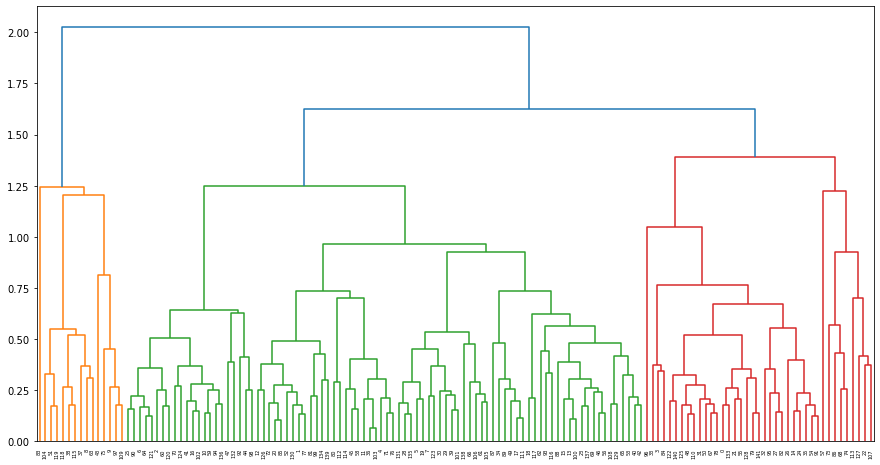

In [133]:
# complete linkage
mergings = linkage(df_m2, method="complete", metric='euclidean')
plt.figure(figsize = (12,8))
dendrogram(mergings)
plt.show()

### Single linkage model is giving very skewed results. So, we would rather focus on complete linkage. Let's cut the dendogram at threshold of 1.5, to obtain 3 clusters.

In [134]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [135]:
df_hier = pd.concat([df['country'][df['gdpp'] < (q3+1.5*(q3 - q1))].reset_index(drop = True), pd.Series(cluster_labels)], axis = 1)
df_hier.shape

(142, 2)

In [136]:
pd.Series(cluster_labels).value_counts()

1    88
0    39
2    15
dtype: int64

In [138]:
df_final = pd.merge(left = df_final, right= df_hier, on='country')
df_final.rename({0:'hier_complete'}, axis = 1, inplace = True)
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,kmeans_no_outlier,hier_complete
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2,1
138,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2,1
139,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2,1
140,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,0


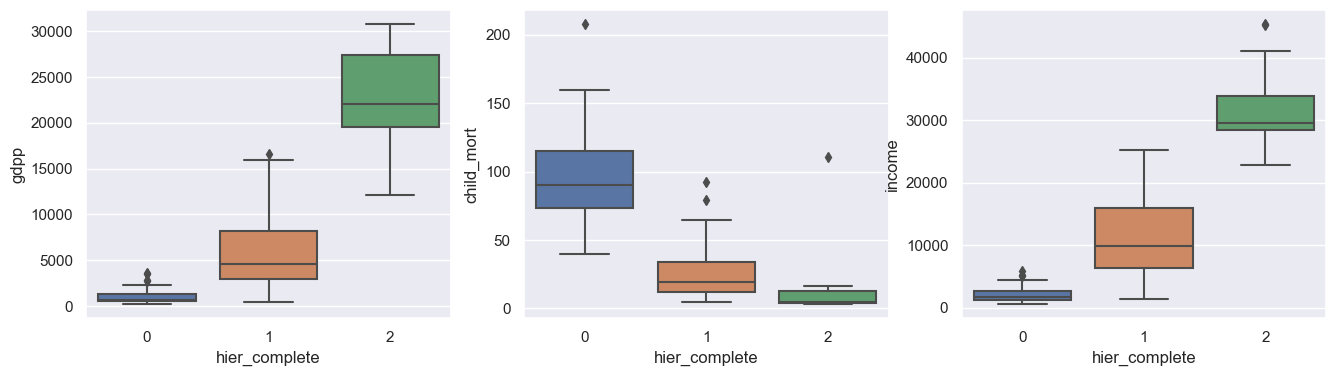

In [278]:
# for hierarchical clustering with complete linkage-outliers removed
sns.set_style('darkgrid')
fig, axe = plt.subplots(1,3, figsize = [16,4])

# for kmeans-all data points
for i,col in enumerate(vars):
    sns.boxplot(data = df_final, x = 'hier_complete', y = col, ax = axe[i])
    
plt.show()

### Observations-

1. Cluster 0 - in hier clustering model is cluster of under-developed countries. There are 39 countries in this cluster.


In [140]:
df_final[ df_final['hier_complete'] == 0 ]['country'].to_numpy()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mozambique', 'Niger', 'Nigeria',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

### Summary-

We used unsupervised learning models- kmeans and hierarchical clustering, to cluster group of countries, that are under-developed. We can prioritize aids to these countries - Afghanistan, Angola, Benin, Burkina Faso, Burundi,
       Cameroon, Central African Republic, Chad, Comoros,
       Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Gambia,
       Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati,
       Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania,
       Micronesia, Fed. Sts., Mozambique, Niger, Nigeria,
       Rwanda, Senegal, Sierra Leone, Sudan, Tanzania,
       Timor-Leste, Togo, Uganda, Yemen, Zambia

### Vizualization of Results-

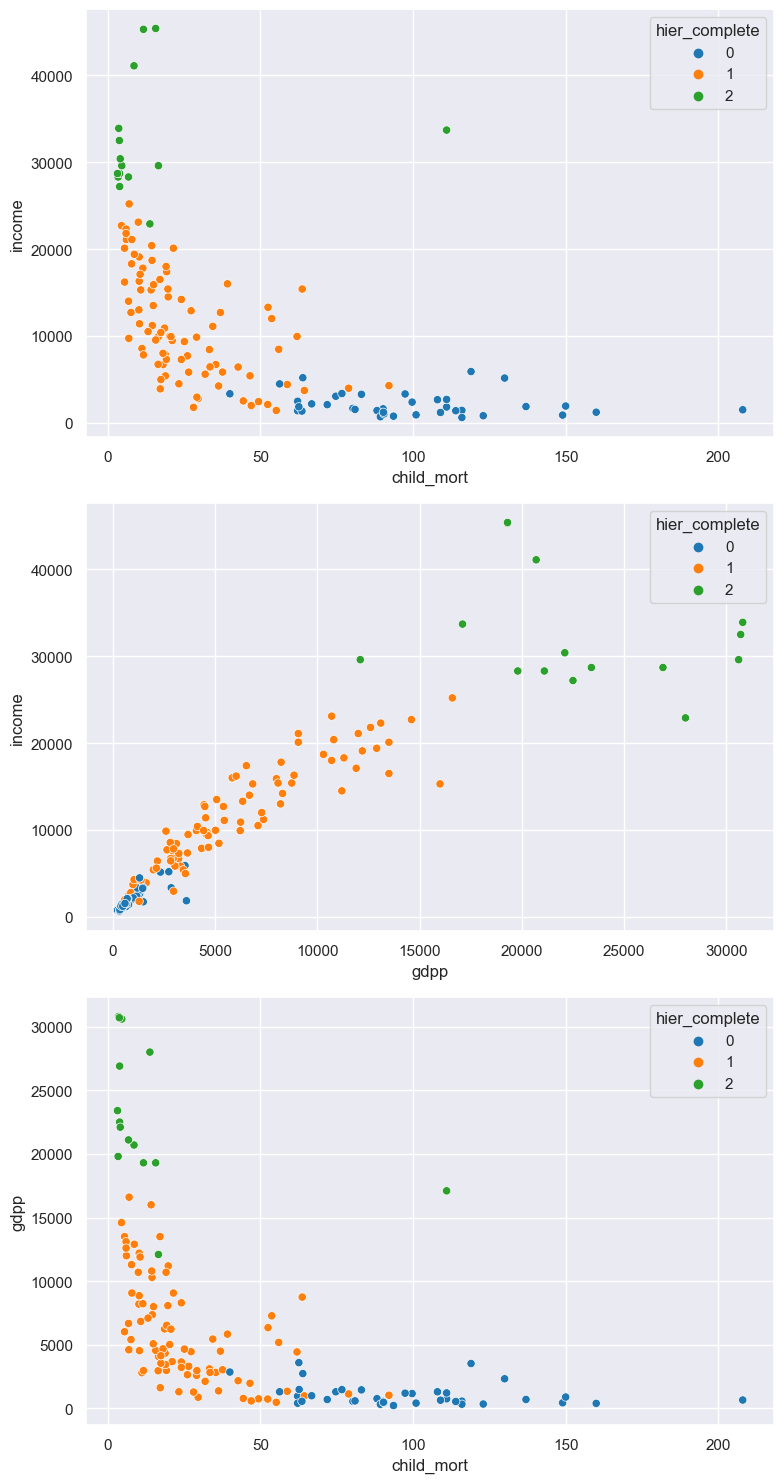

In [275]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3,1, figsize = (8,15))

sns.scatterplot(data = df_final, x = 'child_mort',y = 'income', ax = ax[0], hue = 'hier_complete', palette='tab10')
sns.scatterplot(data = df_final, x = 'gdpp',      y = 'income', ax = ax[1], hue = 'hier_complete', palette='tab10')
sns.scatterplot(data = df_final, x = 'child_mort',y = 'gdpp'  , ax = ax[2], hue = 'hier_complete', palette='tab10')

plt.tight_layout()
plt.show()
